# Import packages

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score, precision_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches
import pickle

# Read data

In [216]:
df_data = pd.read_csv("../dataset/adult.csv")

In [217]:
df_data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [218]:
df_data['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

# Check data

In [219]:
df_data.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [220]:
df_data["native-country"].value_counts()

native-country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

In [221]:
df_data["income"].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [222]:
df_data = df_data.drop(['fnlwgt', 'educational-num'], axis = 1) 

In [223]:
# col_names = df_data.select_dtypes("object").columns
col_names = df_data.columns

In [224]:
col_names

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income'],
      dtype='object')

# Check Nulls and replace values

In [225]:
# Remove All Spaces from Strings in a DataFrame
df_data = df_data.applymap(lambda x: x.replace(" ", "") if isinstance(x, str) else x)

In [226]:
# Replace "?" with NaN
df_data.replace("?", np.nan, inplace=True)

# Fill NaN values with the mode of each column
for c in col_names:
    if df_data[c].isnull().any():  # Check if the column has missing values
        mode_value = df_data[c].mode()[0]  # Get the most frequent value (mode)
        df_data[c].fillna(mode_value, inplace=True)

In [227]:
df_data['workclass'].value_counts()

workclass
Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [228]:
df_data.drop_duplicates(inplace=True)

In [229]:
df_data.duplicated().sum()

np.int64(0)

In [230]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28970 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             28970 non-null  int64 
 1   workclass       28970 non-null  object
 2   education       28970 non-null  object
 3   marital-status  28970 non-null  object
 4   occupation      28970 non-null  object
 5   relationship    28970 non-null  object
 6   race            28970 non-null  object
 7   gender          28970 non-null  object
 8   capital-gain    28970 non-null  int64 
 9   capital-loss    28970 non-null  int64 
 10  hours-per-week  28970 non-null  int64 
 11  native-country  28970 non-null  object
 12  income          28970 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.1+ MB


In [231]:
df_data['workclass'].value_counts()

workclass
Private             21130
Self-emp-not-inc     2473
Local-gov            2038
State-gov            1271
Self-emp-inc         1091
Federal-gov           946
Without-pay            14
Never-worked            7
Name: count, dtype: int64

# Encoding

In [232]:
le = LabelEncoder()

# Define the categorical columns
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 
                'relationship', 'race', 'gender', 'native-country']

# Initialize a dictionary to store the encoders
encoders = {col: LabelEncoder() for col in categorical_columns}

# Fit encoders on training data or known categories
for col in categorical_columns:
    # Assuming `df[col]` is the training data for each feature
    df_data[col] = encoders[col].fit_transform(df_data[col])

for col, encoder in encoders.items():
    print(f"Mappings for {col}:")
    print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))


Mappings for workclass:
{'Federal-gov': np.int64(0), 'Local-gov': np.int64(1), 'Never-worked': np.int64(2), 'Private': np.int64(3), 'Self-emp-inc': np.int64(4), 'Self-emp-not-inc': np.int64(5), 'State-gov': np.int64(6), 'Without-pay': np.int64(7)}
Mappings for education:
{'10th': np.int64(0), '11th': np.int64(1), '12th': np.int64(2), '1st-4th': np.int64(3), '5th-6th': np.int64(4), '7th-8th': np.int64(5), '9th': np.int64(6), 'Assoc-acdm': np.int64(7), 'Assoc-voc': np.int64(8), 'Bachelors': np.int64(9), 'Doctorate': np.int64(10), 'HS-grad': np.int64(11), 'Masters': np.int64(12), 'Preschool': np.int64(13), 'Prof-school': np.int64(14), 'Some-college': np.int64(15)}
Mappings for marital-status:
{'Divorced': np.int64(0), 'Married-AF-spouse': np.int64(1), 'Married-civ-spouse': np.int64(2), 'Married-spouse-absent': np.int64(3), 'Never-married': np.int64(4), 'Separated': np.int64(5), 'Widowed': np.int64(6)}
Mappings for occupation:
{'Adm-clerical': np.int64(0), 'Armed-Forces': np.int64(1), 'Cra

In [233]:
# Save the encoders dictionary to a .pkl file
with open('encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)

print("Encoders have been saved to 'encoders.pkl'")

Encoders have been saved to 'encoders.pkl'


In [245]:
df_data['income'] = le.fit_transform(df_data['income'])

# Exploratory Data Analysis

Text(0.5, 1.0, '<=50K Income vs >50K Income Count')

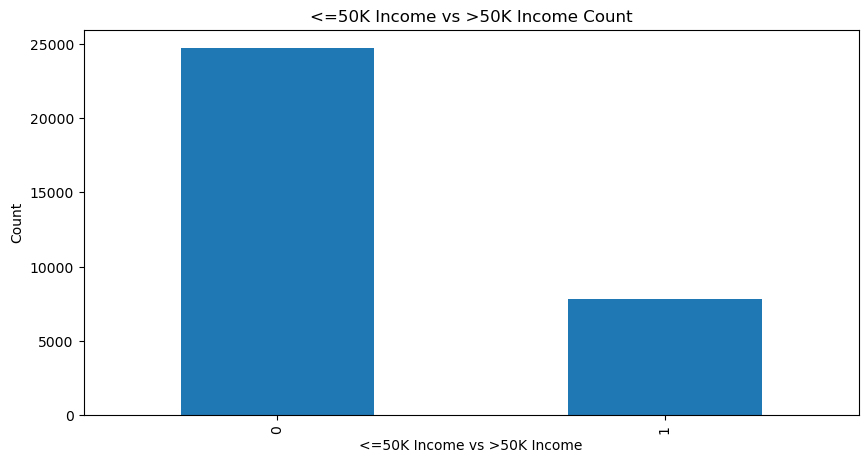

In [11]:
# Plot Fraud vs Non-fraud cases
plt.figure(figsize=(10,5))
ax = df_data.income.value_counts().plot(kind = 'bar')
plt.xlabel("<=50K Income vs >50K Income")
plt.ylabel("Count")
plt.title("<=50K Income vs >50K Income Count")

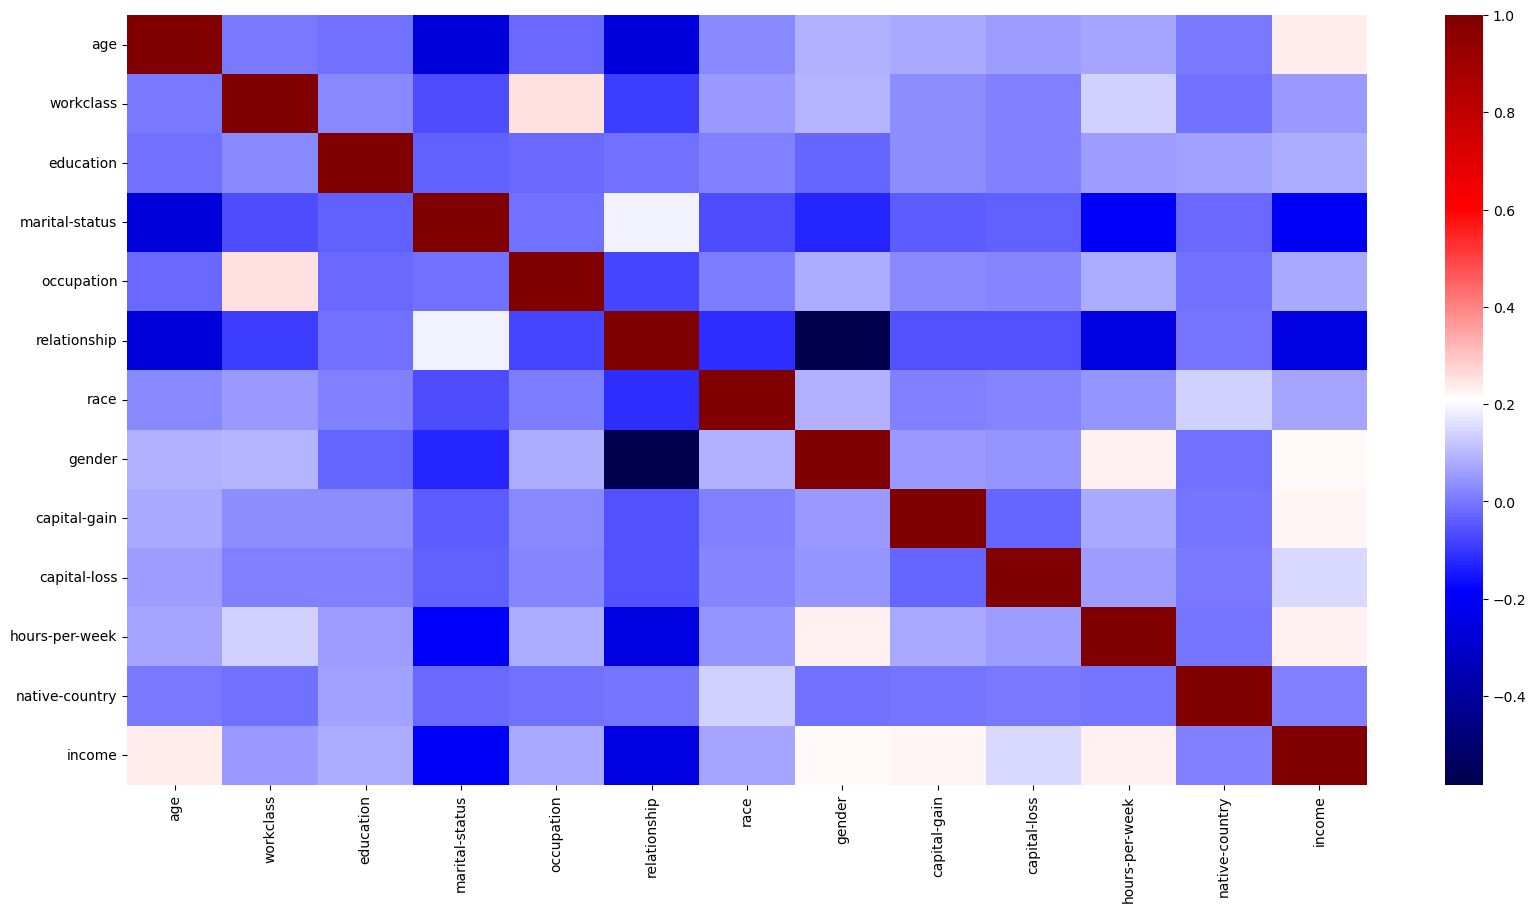

In [12]:
# Heatmap to find any high correlations
plt.figure(figsize=(20,10))
sns.heatmap(data=df_data.corr(), cmap="seismic")
plt.show()

# Label Data

In [246]:
X = df_data.drop('income', axis = 1).to_numpy()
Y = df_data['income']

# Cluster data using Dimensionality reduction

In [ ]:
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X.values)

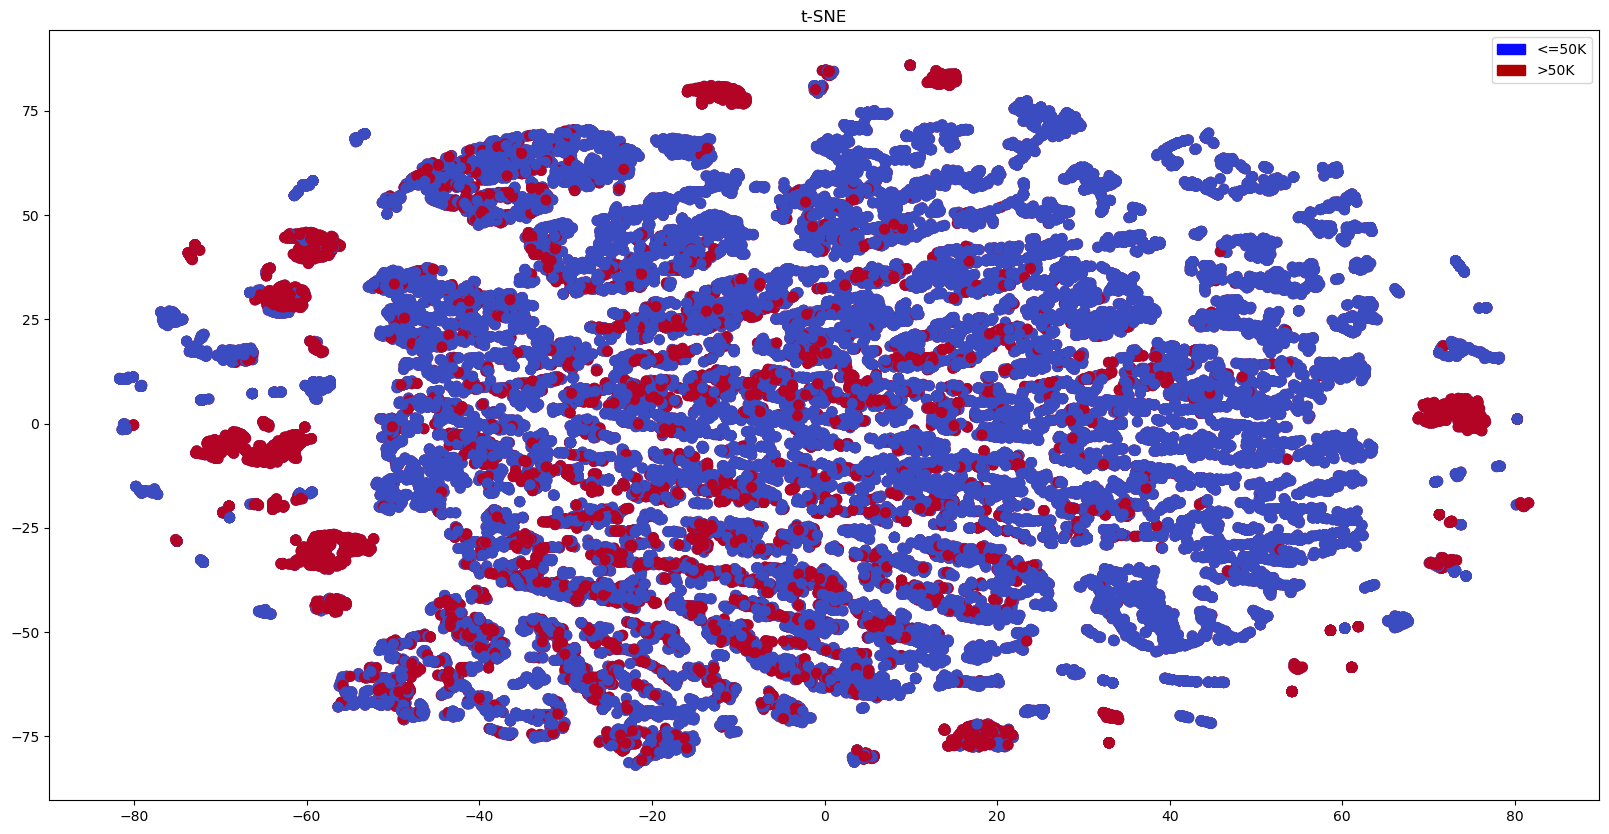

In [ ]:
blue_patch = mpatches.Patch(color='#0A0AFF', label='<=50K')
red_patch = mpatches.Patch(color='#AF0000', label='>50K')
plt.figure(figsize=(20,10))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=(Y == 0), cmap='coolwarm', label='<=50K', linewidths=2)
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=(Y == 1), cmap='coolwarm', label='>50K', linewidths=2)
plt.title('t-SNE')
plt.legend(handles=[blue_patch, red_patch])

# Split into train and test

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100) 

# Train & Test Data using Random Forest 

In [251]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
ypred = rf.predict(X_test)
print(confusion_matrix(y_test, ypred))
print(classification_report(y_test, ypred))
print("Accuracy Score:", accuracy_score(y_test, ypred))
print("Recall Score:", recall_score(y_test, ypred))
print("Precision Score:", precision_score(y_test, ypred))
print("ROC AUC Score: ", roc_auc_score(y_test, ypred))
rf_fp, rf_tp, rf_threshold = roc_curve(y_test, ypred)
print("Threshold:", rf_threshold)

[[5991  536]
 [ 882 1282]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      6527
           1       0.71      0.59      0.64      2164

    accuracy                           0.84      8691
   macro avg       0.79      0.76      0.77      8691
weighted avg       0.83      0.84      0.83      8691

Accuracy Score: 0.8368427108503049
Recall Score: 0.5924214417744916
Precision Score: 0.7051705170517052
ROC AUC Score:  0.7551505094577988
Threshold: [inf  1.  0.]


# Train & Test Data using Gradient Boosting Classifier

In [252]:
gbc = GradientBoostingClassifier(n_estimators=100, random_state=0)
gbc.fit(X_train, y_train)
ypred = gbc.predict(X_test)
print(confusion_matrix(y_test, ypred))
print(classification_report(y_test, ypred))
print("Accuracy Score:", accuracy_score(y_test, ypred))
print("Recall Score:", recall_score(y_test, ypred))
print("Precision Score:", precision_score(y_test, ypred))
print("ROC AUC Score: ", roc_auc_score(y_test, ypred))
gbc_fp, gbc_tp, gbc_threshold = roc_curve(y_test, ypred)
print("Threshold:", gbc_threshold)

[[6165  362]
 [ 842 1322]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6527
           1       0.79      0.61      0.69      2164

    accuracy                           0.86      8691
   macro avg       0.83      0.78      0.80      8691
weighted avg       0.86      0.86      0.86      8691

Accuracy Score: 0.8614658842480727
Recall Score: 0.61090573012939
Precision Score: 0.7850356294536817
ROC AUC Score:  0.7777219013754045
Threshold: [inf  1.  0.]


# Train & Test Data using Ada Boost Classifier

In [253]:
X_train

array([[57,  3,  0, ...,  0, 40, 38],
       [32,  3,  9, ...,  0, 40, 38],
       [34,  3, 15, ...,  0, 60, 38],
       ...,
       [30,  6, 11, ...,  0, 40, 38],
       [36,  3, 15, ...,  0, 50, 38],
       [17,  3,  2, ...,  0, 18, 38]])

In [254]:
abc = AdaBoostClassifier(n_estimators=100, random_state=0)
abc.fit(X_train, y_train)
ypred = abc.predict(X_test)
print(confusion_matrix(y_test, ypred))
print(classification_report(y_test, ypred))
print("Accuracy Score:", accuracy_score(y_test, ypred))
print("Recall Score:", recall_score(y_test, ypred))
print("Precision Score:", precision_score(y_test, ypred))
print("ROC AUC Score: ", roc_auc_score(y_test, ypred))
abc_fp, abc_tp, abc_threshold = roc_curve(y_test, ypred)
print("Threshold:", abc_threshold)

[[6119  408]
 [ 794 1370]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      6527
           1       0.77      0.63      0.70      2164

    accuracy                           0.86      8691
   macro avg       0.83      0.79      0.80      8691
weighted avg       0.86      0.86      0.86      8691

Accuracy Score: 0.8616960073639397
Recall Score: 0.633086876155268
Precision Score: 0.7705286839145107
ROC AUC Score:  0.7852886502731296
Threshold: [inf  1.  0.]


In [255]:
p = abc.predict([[29.98, np.int64(7), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), 1999, 188, 50, np.int64(0)]])
print(p)

[0]


# Train & Test Data using Logistic Regression Classifier

In [86]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
ypred = lr.predict(X_test)
print(confusion_matrix(y_test, ypred))
print(classification_report(y_test, ypred))
print("Accuracy Score:", accuracy_score(y_test, ypred))
print("Recall Score:", recall_score(y_test, ypred))
print("Precision Score:", precision_score(y_test, ypred))
print("ROC AUC Score: ", roc_auc_score(y_test, ypred))
lr_fp, lr_tp, lr_threshold = roc_curve(y_test, ypred)
print("Threshold:", lr)

[[6211  316]
 [1461  703]]
              precision    recall  f1-score   support

           0       0.81      0.95      0.87      6527
           1       0.69      0.32      0.44      2164

    accuracy                           0.80      8691
   macro avg       0.75      0.64      0.66      8691
weighted avg       0.78      0.80      0.77      8691

Accuracy Score: 0.7955356115521804
Recall Score: 0.32486136783733827
Precision Score: 0.689892051030422
ROC AUC Score:  0.6382235443445922
Threshold: LogisticRegression()


# ROC Curve

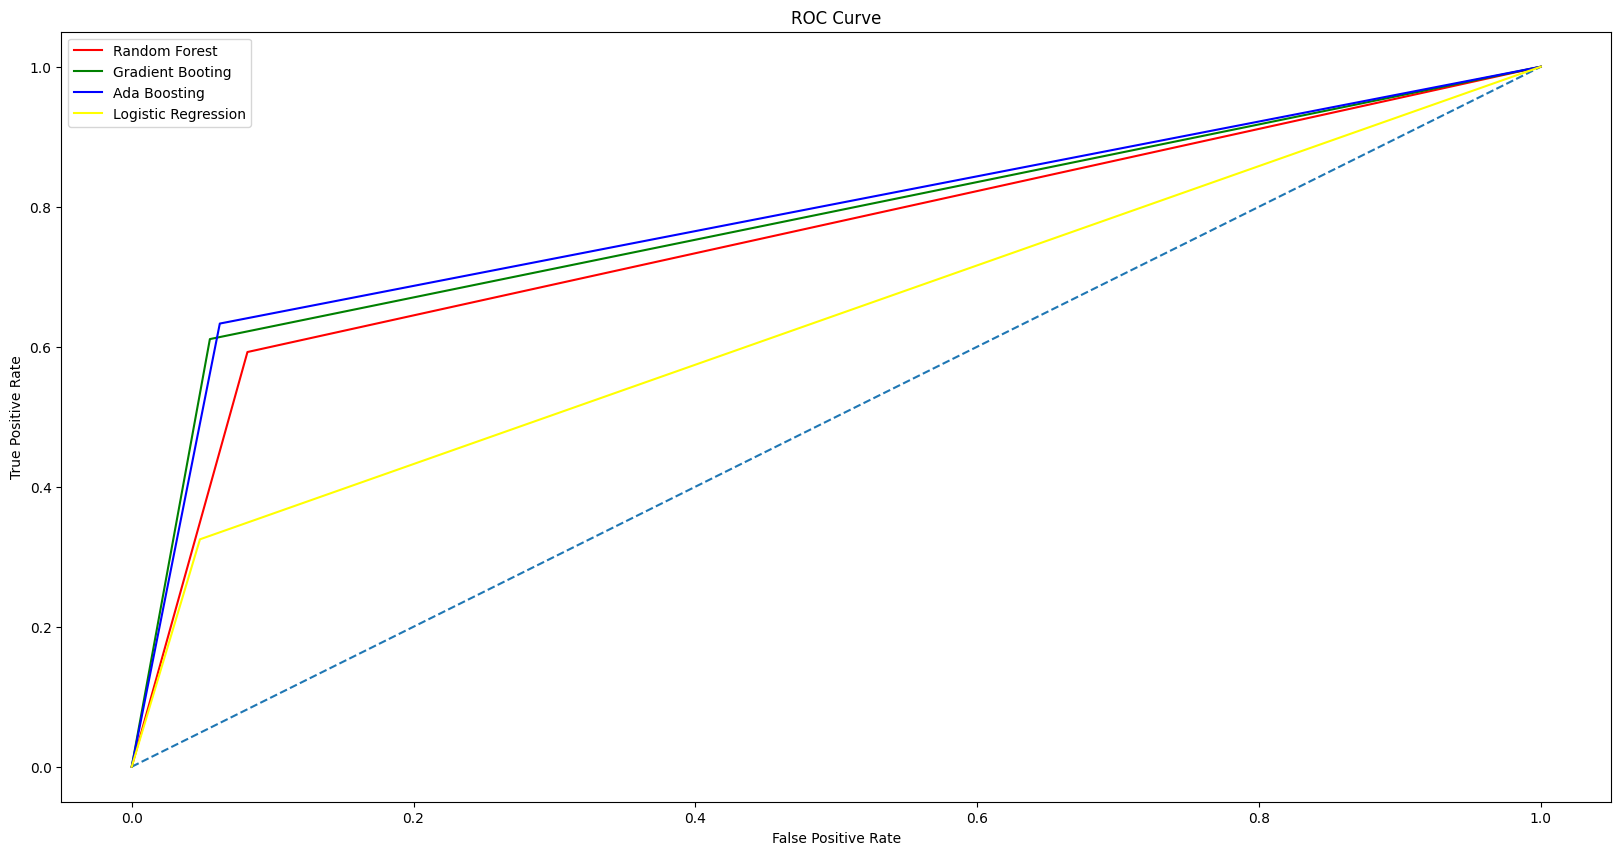

In [256]:
plt.figure(figsize=(20,10))
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.plot(rf_fp, rf_tp, color="red", label = "Random Forest")
plt.plot(gbc_fp, gbc_tp, color="green", label = "Gradient Booting")
plt.plot(abc_fp, abc_tp, color="blue", label = "Ada Boosting")
plt.plot(lr_fp, lr_tp, color="yellow", label = "Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

# Get most important features and their contribution in model

In [88]:
feature_importance_df = pd.DataFrame(X_train.columns, columns=["Feature"])
feature_importance_df["Importance"] = rf.feature_importances_
feature_importance_df.sort_values('Importance', ascending=False, inplace=True)
feature_importance_df = feature_importance_df.head(20)
feature_importance_df

,Feature,Importance
0,age,0.221469
8,capital-gain,0.140255
10,hours-per-week,0.119636
5,relationship,0.103468
2,education,0.102283
4,occupation,0.089590
3,marital-status,0.071336
1,workclass,0.051255
9,capital-loss,0.047128
11,native-country,0.021227


Text(0.5, 1.0, 'Plot Feature Importances')

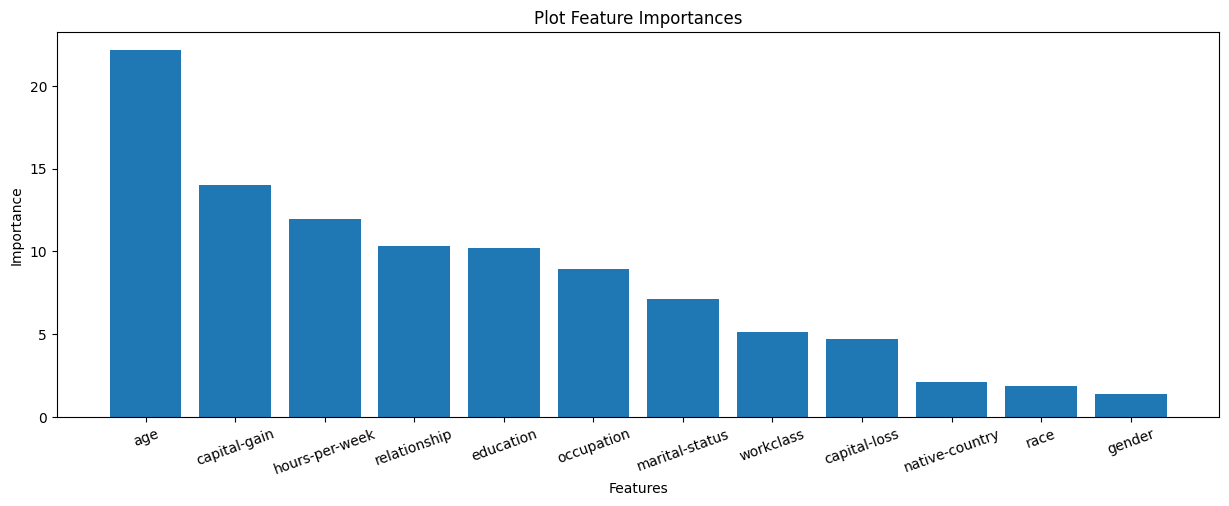

In [89]:
plt.figure(figsize=(15,5))
ax = feature_importance_df['Feature']
plt.bar(range(feature_importance_df.shape[0]), feature_importance_df['Importance']*100)
plt.xticks(range(feature_importance_df.shape[0]), feature_importance_df['Feature'], rotation = 20)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Plot Feature Importances")

# Save Model

In [257]:
model_out = open("model.pkl", "wb")
pickle.dump(abc, model_out)
model_out.close()